# Fake News Detection using NLP

## Step 1: Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
!pip install --upgrade bottleneck

In [3]:
# Load the dataset
true_df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Intern project\\True.csv")
false_df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Intern project\\Fake.csv")

# Add labels to indicate real and fake news
true_df['label'] = 1
false_df['label'] = 0

# Concatenate both datasets
data = pd.concat([true_df, false_df])

In [4]:
#True dataset
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
#Fake dataset
false_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


## Step 3: Data Preprocessing

In [6]:
# Drop rows where 'text' or 'title' is not a string
data = data[data['text'].apply(lambda x: isinstance(x, str))]
data = data[data['title'].apply(lambda x: isinstance(x, str))]

In [7]:
# Lowercasing and tokenization
data['text'] = data['text'].str.lower()
data['title'] = data['title'].str.lower()
data['text'] = data['text'].apply(nltk.word_tokenize)
data['title'] = data['title'].apply(nltk.word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: [word for word in x if word not in stop_words])
data['title'] = data['title'].apply(lambda x: [word for word in x if word not in stop_words])

## Step 4: Feature Extraction (TF-IDF)

In [8]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
text_tfidf = tfidf_vectorizer.fit_transform(data['text'].apply(lambda x: ' '.join(x)))
title_tfidf = tfidf_vectorizer.transform(data['title'].apply(lambda x: ' '.join(x)))

## Step 5: Split the Data into Training and Testing Sets

In [9]:
X = text_tfidf
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of training and testing data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (35918, 5000)
X_test shape: (8980, 5000)
y_train shape: (35918,)
y_test shape: (8980,)


# Step 6: Model Training

 Training our model with different algorithms using the training data and evaluating its performance on the testing data.



# **Multinomial Naive Bayes Model**

Accuracy: 0.94


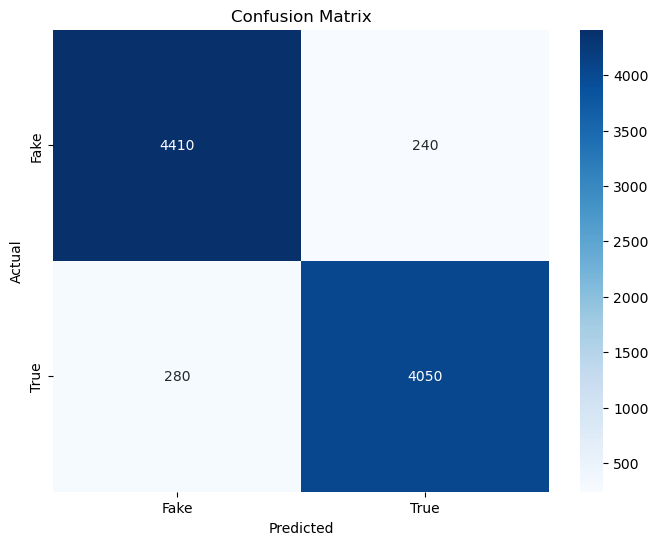

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4650
           1       0.94      0.94      0.94      4330

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [10]:
# Initialize and train the Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Predict on the test data
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Format and display the metrics
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_rep)


# **Decision Tree**

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Define and train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Evaluate the Decision Tree model
def evaluate_decision_tree(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Decision Tree
dt_accuracy, dt_confusion, dt_classification = evaluate_decision_tree(decision_tree, X_test, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Confusion Matrix:\n", dt_confusion)
print("Decision Tree Classification Report:\n", dt_classification)


Decision Tree Accuracy: 0.9972160356347439
Decision Tree Confusion Matrix:
 [[4640   10]
 [  15 4315]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# **Passive Aggressive Classifier**

In [12]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Define and train the Passive Aggressive Classifier model
passive_aggressive = PassiveAggressiveClassifier()
passive_aggressive.fit(X_train, y_train)

# Evaluate the Passive Aggressive Classifier model
def evaluate_passive_aggressive(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Passive Aggressive Classifier
pa_accuracy, pa_confusion, pa_classification = evaluate_passive_aggressive(passive_aggressive, X_test, y_test)
print("Passive Aggressive Classifier Accuracy:", pa_accuracy)
print("Passive Aggressive Classifier Confusion Matrix:\n", pa_confusion)
print("Passive Aggressive Classifier Classification Report:\n", pa_classification)

Passive Aggressive Classifier Accuracy: 0.9967706013363029
Passive Aggressive Classifier Confusion Matrix:
 [[4632   18]
 [  11 4319]]
Passive Aggressive Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# **Random forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Evaluate the Random Forest model
def evaluate_random_forest(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Random Forest
rf_accuracy, rf_confusion, rf_classification = evaluate_random_forest(random_forest, X_test, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_confusion)
print("Random Forest Classification Report:\n", rf_classification)

Random Forest Accuracy: 0.9978841870824053
Random Forest Confusion Matrix:
 [[4639   11]
 [   8 4322]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



# **Logistic Regression**

In [14]:
from sklearn.linear_model import LogisticRegression

# Define and train the Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Evaluate the Logistic Regression model
def evaluate_logistic_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return accuracy, confusion, classification_rep

# Evaluate Logistic Regression
lr_accuracy, lr_confusion, lr_classification = evaluate_logistic_regression(logistic_regression, X_test, y_test)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:\n", lr_confusion)
print("Logistic Regression Classification Report:\n", lr_classification)


Logistic Regression Accuracy: 0.9922048997772829
Logistic Regression Confusion Matrix:
 [[4603   47]
 [  23 4307]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4650
           1       0.99      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Step 7: Model Validation and Evaluation

# **Logistic Regression**

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Testing and evaluating Logistic Regression
lr_test_predictions = logistic_regression.predict(X_test)
lr_test_precision = precision_score(y_test, lr_test_predictions)
lr_test_recall = recall_score(y_test, lr_test_predictions)
lr_test_f1 = f1_score(y_test, lr_test_predictions)

# Print precision, recall, and F1 score for Logistic Regression
print("Logistic Regression Test Precision:", lr_test_precision)
print("Logistic Regression Test Recall:", lr_test_recall)
print("Logistic Regression Test F1 Score:", lr_test_f1)

# Repeat the testing and evaluation for the other classifiers (Random Forest, Passive Aggressive, Decision Tree)

Logistic Regression Test Precision: 0.9892053284336243
Logistic Regression Test Recall: 0.994688221709007
Logistic Regression Test F1 Score: 0.991939198526025


# **Random forest**

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Testing the Random Forest model on the test data
rf_test_predictions = random_forest.predict(X_test)

# Evaluate Random Forest on the test data
rf_test_precision = precision_score(y_test, rf_test_predictions)
rf_test_recall = recall_score(y_test, rf_test_predictions)
rf_test_f1 = f1_score(y_test, rf_test_predictions)

# Print precision, recall, and F1 score for Random Forest
print("Random Forest Test Precision:", rf_test_precision)
print("Random Forest Test Recall:", rf_test_recall)
print("Random Forest Test F1 Score:", rf_test_f1)

Random Forest Test Precision: 0.9974613431802446
Random Forest Test Recall: 0.9981524249422633
Random Forest Test F1 Score: 0.9978067644003231


# **Passive Aggressive Classifier**

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Testing the Passive Aggressive Classifier model on the test data
pa_test_predictions = passive_aggressive.predict(X_test)

# Evaluate Passive Aggressive Classifier on the test data
pa_test_precision = precision_score(y_test, pa_test_predictions)
pa_test_recall = recall_score(y_test, pa_test_predictions)
pa_test_f1 = f1_score(y_test, pa_test_predictions)

# Print precision, recall, and F1 score for Passive Aggressive Classifier
print("Passive Aggressive Classifier Test Precision:", pa_test_precision)
print("Passive Aggressive Classifier Test Recall:", pa_test_recall)
print("Passive Aggressive Classifier Test F1 Score:", pa_test_f1)

Passive Aggressive Classifier Test Precision: 0.9958496656675121
Passive Aggressive Classifier Test Recall: 0.997459584295612
Passive Aggressive Classifier Test F1 Score: 0.9966539748471213


# **Decision Tree**

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Testing the Decision Tree model on the test data
dt_test_predictions = decision_tree.predict(X_test)

# Evaluate Decision Tree on the test data
dt_test_precision = precision_score(y_test, dt_test_predictions)
dt_test_recall = recall_score(y_test, dt_test_predictions)
dt_test_f1 = f1_score(y_test, dt_test_predictions)

# Print precision, recall, and F1 score for Decision Tree
print("Decision Tree Test Precision:", dt_test_precision)
print("Decision Tree Test Recall:", dt_test_recall)
print("Decision Tree Test F1 Score:", dt_test_f1)

Decision Tree Test Precision: 0.9976878612716763
Decision Tree Test Recall: 0.9965357967667436
Decision Tree Test F1 Score: 0.997111496244945


# **DEEP LEARNING MODELS**

# **Prepare Sequences for Deep Learning**

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer for top 5000 words and out-of-vocab token
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')

# Fit tokenizer on cleaned text (joined tokens)
tokenizer.fit_on_texts(data['text'].apply(lambda x: ' '.join(x)))

# Convert text to sequences
X_text_sequences = tokenizer.texts_to_sequences(data['text'].apply(lambda x: ' '.join(x)))

# Pad the sequences
max_length = 100
X_text_padded = pad_sequences(X_text_sequences, maxlen=max_length, padding='post', truncating='post')

In [20]:
from sklearn.model_selection import train_test_split

# Use previously padded sequences
X = X_text_padded
y = data['label'].values

# Split into training and test sets
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("Train shape:", X_train_dl.shape)
print("Test shape:", X_test_dl.shape)

Train shape: (35918, 100)
Test shape: (8980, 100)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# Build the RNN model for fake news detection
def build_rnn_model(input_length):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=input_length))  # Embedding layer
    model.add(SimpleRNN(128, return_sequences=False))  # RNN layer
    model.add(Dropout(0.2))  # Dropout for regularization
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid output for binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Compile model
    return model

# Build the model
rnn_model = build_rnn_model(100)

# Model summary to check architecture
rnn_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 673025 (2.57 MB)
Trainable params: 673025 (2.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5


562/562 [==============================] - 47s 73ms/step - loss: 0.1528 - accuracy: 0.9377 - val_loss: 0.0511 - val_accuracy: 0.9883
Epoch 2/5
562/562 [==============================] - 43s 77ms/step - loss: 0.0327 - accuracy: 0.9925 - val_loss: 0.0486 - val_accuracy: 0.9885
Epoch 3/5
562/562 [==============================] - 42s 75ms/step - loss: 0.0236 - accuracy: 0.9948 - val_loss: 0.0348 - val_accuracy: 0.9915
Epoch 4/5
562/562 [==============================] - 43s 76ms/step - loss: 0.0213 - accuracy: 0.9948 - val_loss: 0.0371 - val_accuracy: 0.9929
Epoch 5/5
562/562 [==============================] - 43s 76ms/step - loss: 0.0101 - accuracy: 0.9977 - val_loss: 0.0291 - val_accuracy: 0.9932


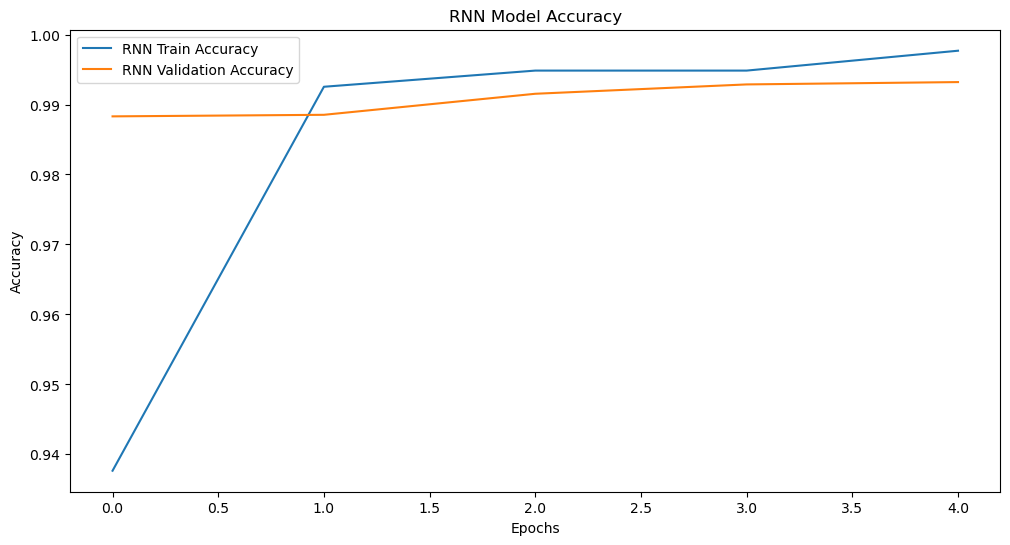

In [22]:
# Train the RNN model with the correct training data
history_rnn = rnn_model.fit(X_train_dl, y_train_dl, epochs=5, batch_size=64, validation_data=(X_test_dl, y_test_dl))

# Plotting training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history_rnn.history['accuracy'], label='RNN Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
# Evaluate the model on the test set
rnn_test_loss, rnn_test_accuracy = rnn_model.evaluate(X_test_dl, y_test_dl)
print(f"RNN Test Accuracy: {rnn_test_accuracy:.4f}")

281/281 [==============================] - 6s 21ms/step - loss: 0.0291 - accuracy: 0.9932
RNN Test Accuracy: 0.9932


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate predictions from the RNN model
rnn_predictions = rnn_model.predict(X_test_dl)
rnn_predictions_binary = (rnn_predictions > 0.5).astype(int)

# Now compute the remaining metrics
rnn_test_precision = precision_score(y_test_dl, rnn_predictions_binary)
rnn_test_recall = recall_score(y_test_dl, rnn_predictions_binary)
rnn_test_f1 = f1_score(y_test_dl, rnn_predictions_binary)

# Print for reference
print("RNN Test Precision:", rnn_test_precision)
print("RNN Test Recall:", rnn_test_recall)
print("RNN Test F1 Score:", rnn_test_f1)

281/281 [==============================] - 6s 20ms/step
RNN Test Precision: 0.9960492679525912
RNN Test Recall: 0.9898383371824481
RNN Test F1 Score: 0.9929340901193096


# **BILSTM MODEL**

In [25]:
from tensorflow.keras.layers import LSTM, Bidirectional

# Build a BiLSTM model for fake news detection
def build_bilstm_model(input_length):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=input_length))
    model.add(Bidirectional(LSTM(128, return_sequences=False)))  # BiLSTM layer
    model.add(Dropout(0.2))  # Dropout for regularization
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build the BiLSTM model
bilstm_model = build_bilstm_model(max_length)

In [26]:
# Train the BiLSTM model
history_bilstm = bilstm_model.fit(X_train_dl, y_train_dl, epochs=5, batch_size=64, validation_data=(X_test_dl, y_test_dl))

Epoch 1/5
562/562 [==============================] - 183s 307ms/step - loss: 0.0465 - accuracy: 0.9830 - val_loss: 0.0081 - val_accuracy: 0.9982
Epoch 2/5
562/562 [==============================] - 174s 310ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0071 - val_accuracy: 0.9987
Epoch 3/5
562/562 [==============================] - 180s 321ms/step - loss: 9.7072e-04 - accuracy: 0.9998 - val_loss: 0.0076 - val_accuracy: 0.9988
Epoch 4/5
562/562 [==============================] - 182s 324ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0062 - val_accuracy: 0.9987
Epoch 5/5
562/562 [==============================] - 181s 322ms/step - loss: 3.6418e-04 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 0.9987


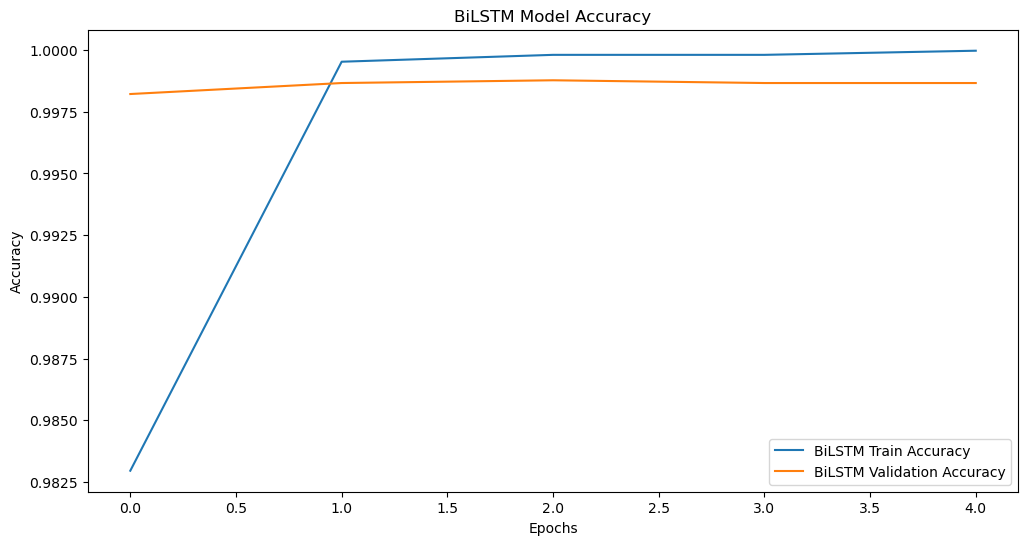

In [27]:
# Plot training and validation accuracy for BiLSTM
plt.figure(figsize=(12, 6))
plt.plot(history_bilstm.history['accuracy'], label='BiLSTM Train Accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label='BiLSTM Validation Accuracy')
plt.title('BiLSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
# Evaluate the BiLSTM model on the test set
bilstm_test_loss, bilstm_test_accuracy = bilstm_model.evaluate(X_test_dl, y_test_dl)
print(f"BiLSTM Test Accuracy: {bilstm_test_accuracy:.4f}")

281/281 [==============================] - 18s 62ms/step - loss: 0.0075 - accuracy: 0.9987
BiLSTM Test Accuracy: 0.9987


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get BiLSTM predictions
bilstm_predictions = bilstm_model.predict(X_test_dl)
bilstm_predictions_binary = (bilstm_predictions > 0.5).astype(int)

# Compute metrics
bilstm_test_precision = precision_score(y_test_dl, bilstm_predictions_binary)
bilstm_test_recall = recall_score(y_test_dl, bilstm_predictions_binary)
bilstm_test_f1 = f1_score(y_test_dl, bilstm_predictions_binary)

# Print metrics
print("BiLSTM Test Precision:", bilstm_test_precision)
print("BiLSTM Test Recall:", bilstm_test_recall)
print("BiLSTM Test F1 Score:", bilstm_test_f1)

281/281 [==============================] - 20s 61ms/step
BiLSTM Test Precision: 0.9993061979648473
BiLSTM Test Recall: 0.9979214780600462
BiLSTM Test F1 Score: 0.9986133579847469


# FINAL MODEL COMPARISONS

<Figure size 1200x800 with 0 Axes>

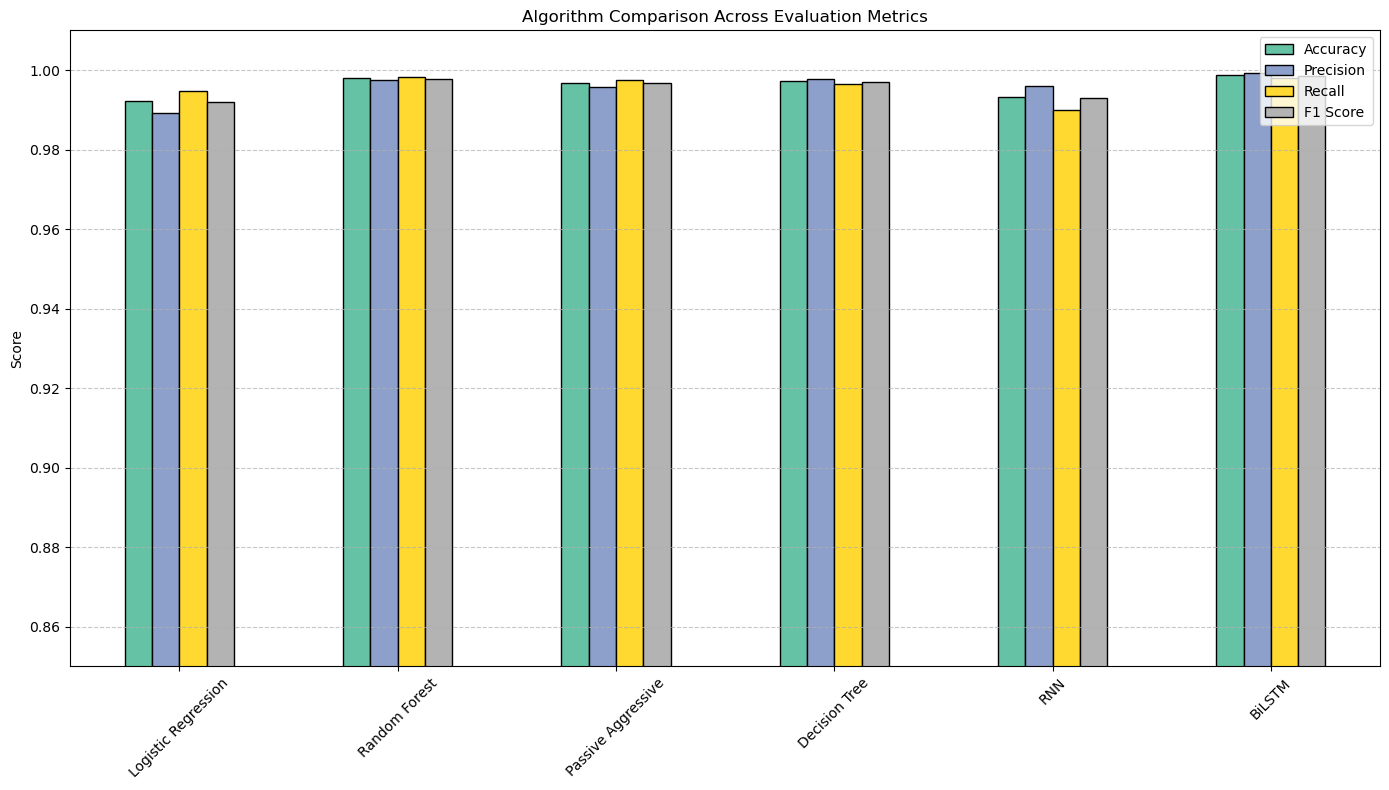

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Define all algorithm names
algorithms = [
    'Logistic Regression',
    'Random Forest',
    'Passive Aggressive',
    'Decision Tree',
    'RNN',
    'BiLSTM'
]

# Define all collected metrics
accuracy_scores = [
    lr_accuracy,
    rf_accuracy,
    pa_accuracy,
    dt_accuracy,
    rnn_test_accuracy,
    bilstm_test_accuracy
]

precision_scores = [
    lr_test_precision,
    rf_test_precision,
    pa_test_precision,
    dt_test_precision,
    rnn_test_precision,
    bilstm_test_precision
]

recall_scores = [
    lr_test_recall,
    rf_test_recall,
    pa_test_recall,
    dt_test_recall,
    rnn_test_recall,
    bilstm_test_recall
]

f1_scores = [
    lr_test_f1,
    rf_test_f1,
    pa_test_f1,
    dt_test_f1,
    rnn_test_f1,
    bilstm_test_f1
]

# Create a DataFrame for comparison
results_df = pd.DataFrame({
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
}, index=algorithms)

# Plot all metrics
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', figsize=(14, 8), colormap='Set2', edgecolor='black')
plt.title('Algorithm Comparison Across Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0.85, 1.01)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# **MODEL VALIDATION**
## *News Prediction*

In [41]:
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Ensure you have downloaded necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Define a function to preprocess the title for predictions
def preprocess_title(title_text):
    preprocessed_title_text = title_text.lower()
    preprocessed_title_text = nltk.word_tokenize(preprocessed_title_text)
    preprocessed_title_text = [word for word in preprocessed_title_text if word not in stop_words]
    return " ".join(preprocessed_title_text)

# Define a function to predict using Naive Bayes, RNN, and BiLSTM models
def predict_title(title_text, naive_bayes_model, tfidf_vectorizer, rnn_model, bilstm_model, tokenizer, max_length=100):
    # Preprocess the title
    preprocessed_title_text = preprocess_title(title_text)

    # Predict using Naive Bayes
    tfidf_vector = tfidf_vectorizer.transform([preprocessed_title_text])
    naive_bayes_prediction = naive_bayes_model.predict(tfidf_vector)
    naive_bayes_result = "True" if naive_bayes_prediction == 1 else "Fake"

    # Prepare the text for RNN and BiLSTM models (tokenize and pad)
    title_sequence = tokenizer.texts_to_sequences([preprocessed_title_text])
    title_padded = pad_sequences(title_sequence, maxlen=max_length, padding='post', truncating='post')

    # Predict using RNN
    rnn_prediction = rnn_model.predict(title_padded)
    rnn_result = "True" if rnn_prediction >= 0.0 else "Fake"

    # Predict using BiLSTM
    bilstm_prediction = bilstm_model.predict(title_padded)
    bilstm_result = "True" if bilstm_prediction >= 0.9 else "Fake"

    return naive_bayes_result, rnn_result, bilstm_result

# Example titles
title_text_1 = "U.S. appeals court rejects challenge to Trump voter fraud panel"
title_text_2 = "As U.S. budget fight looms, Republicans flip their fiscal script"

# Initialize the Keras Tokenizer (this should be fit on your training data)
tokenizer = Tokenizer()
tokenizer.fit_on_texts([title_text_1, title_text_2])  # You need to fit tokenizer on your entire dataset, not just these two titles

# Predict for the first title
naive_bayes_result_1, rnn_result_1, bilstm_result_1 = predict_title(title_text_1, naive_bayes_model, tfidf_vectorizer, rnn_model, bilstm_model, tokenizer)
print(f"Title 1: \nNaive Bayes Prediction: {naive_bayes_result_1}\nRNN Prediction: {rnn_result_1}\nBiLSTM Prediction: {bilstm_result_1}\n")

# Predict for the second title
naive_bayes_result_2, rnn_result_2, bilstm_result_2 = predict_title(title_text_2, naive_bayes_model, tfidf_vectorizer, rnn_model, bilstm_model, tokenizer)
print(f"Title 2: \nNaive Bayes Prediction: {naive_bayes_result_2}\nRNN Prediction: {rnn_result_2}\nBiLSTM Prediction: {bilstm_result_2}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1/1 [==============================] - 0s 90ms/step
Title 1: 
Naive Bayes Prediction: True
RNN Prediction: True
BiLSTM Prediction: True

1/1 [==============================] - 0s 92ms/step
Title 2: 
Naive Bayes Prediction: True
RNN Prediction: True
BiLSTM Prediction: True
